#### Примеры использования данных о биполярных активных областях,<br>нарушающих закон Хейла

Открываем файл `barvhl.h5` с диска:

In [1]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

barvhl_path = '../barvhl.h5'

# таблицы с описанием базы данных
d_usaf = pd.read_hdf(barvhl_path, key='usaf_data_description', mode='r')
d_dpd = pd.read_hdf(barvhl_path, key='dpd_data_description', mode='r')
d_special = pd.read_hdf(barvhl_path, key='special_fields_description', mode='r')

# база данных в табличной форме
dat = pd.read_hdf(barvhl_path, 'dahr', mode='r')

##### Широтно-временная диаграмма площадей пятен в активных областях, <br> нарушающих закон Хейла

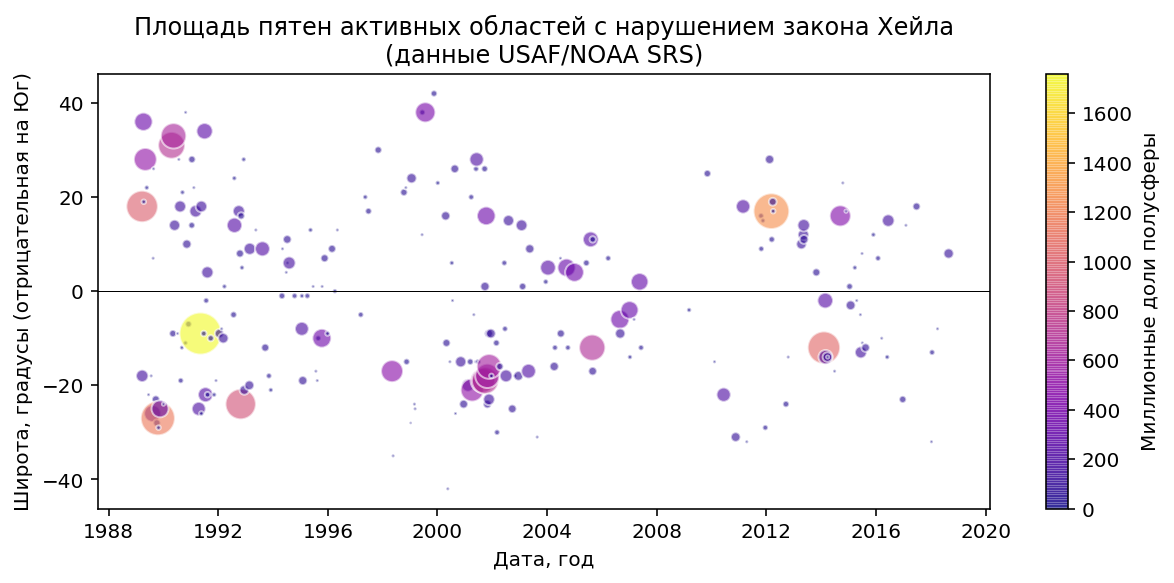

In [2]:
fig, ax = plt.subplots()
ax1 = dat.plot.scatter(x='datetime_u',
                       y='lat_u',
                       s=dat['area_cor_u']/4,
                       c=dat['area_cor_u'], colormap='plasma',
                       edgecolors='white', alpha=0.6,
                       figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax1.set_xlabel('Дата, год')
l2=ax1.set_ylabel(d_usaf.loc['lat_u'][1])
re=plt.title('''Площадь пятен активных областей с нарушением закона Хейла
(данные USAF/NOAA SRS)''')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Миллионные доли полусферы')

##### Широтно-временная диаграмма числа пятен в активных областях, <br> нарушающих закон Хейла

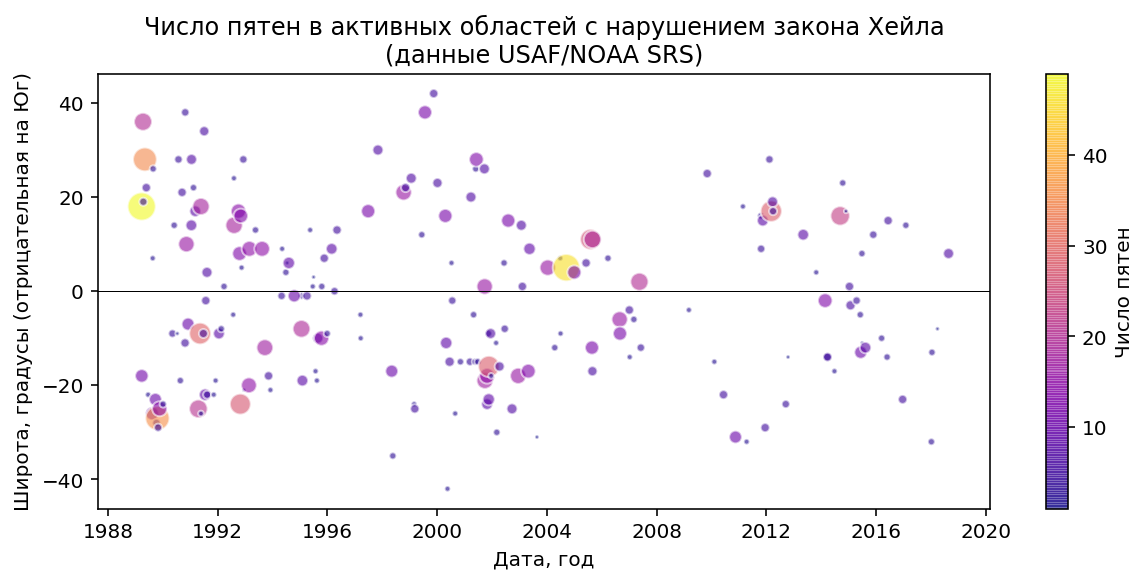

In [3]:
fig, ax = plt.subplots()
ax1 = dat.plot.scatter(x='datetime_u',
                       y='lat_u',
                       s=dat['spot_n_u']*4,
                       c=dat['spot_n_u'], colormap='plasma',
                       edgecolors='white', alpha=0.6,
                       figsize=(10, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax1.set_xlabel('Дата, год')
l2=ax1.set_ylabel(d_usaf.loc['lat_u'][1])
re=plt.title('''Число пятен в активных областей с нарушением закона Хейла
(данные USAF/NOAA SRS)''')
f = plt.gcf()
cax = f.get_axes()[1]
ct=cax.set_ylabel('Число пятен')

##### Гистограмма числа пятен в активных областях, нарушающих закон Хейла

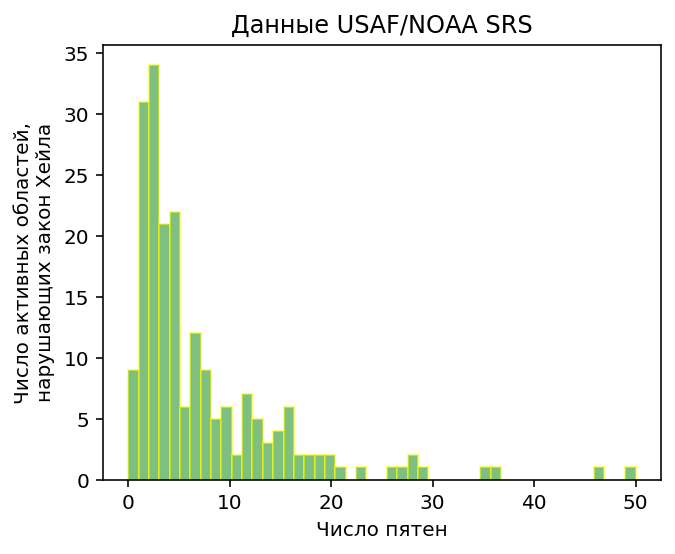

In [4]:
df = dat['spot_n_u']
HIST_BINS = np.linspace(0, 50, 50)
n, _ = np.histogram(df, HIST_BINS)

fig, ax = plt.subplots(figsize=(5, 4))
_, _, bar_container = ax.hist(df, HIST_BINS, lw=1,
                              ec='yellow',
                              fc='green',
                              alpha=0.5)

l1=ax.set_xlabel('Число пятен')
l2=ax.set_ylabel('''Число активных областей,
нарушающих закон Хейла''')
re=plt.title('Данные USAF/NOAA SRS')

##### Расстояние между противоположными полярностями как функция <br> площади пятна и наклона оси группы пятен

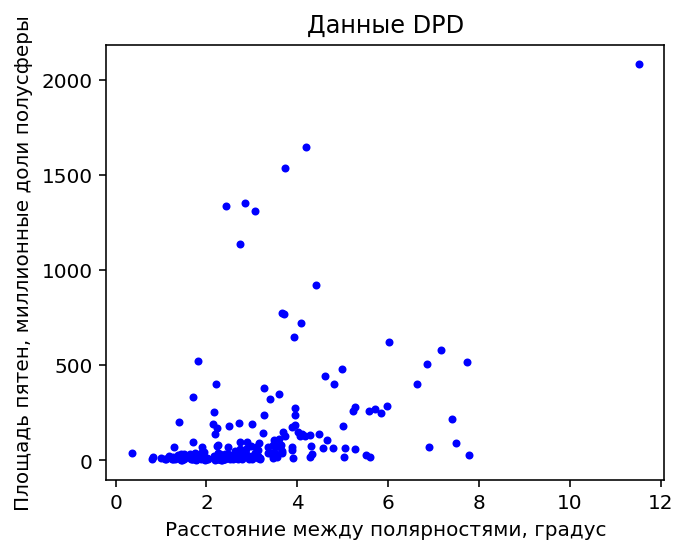

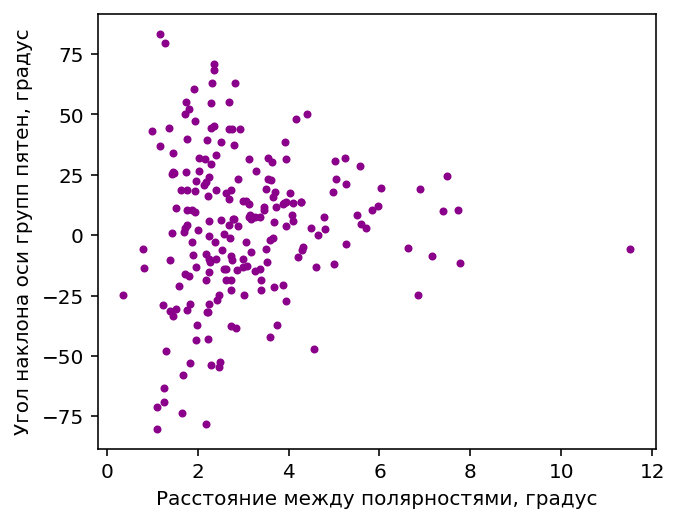

In [5]:
# Расстояние между центрами тяжести противоположных полярностей
l = np.sqrt( (dat['lat_f_d'] - dat['lat_l_d'])**2 +
            ((dat['lon_f_d'] - dat['lon_l_d']) *
             np.cos(dat['lat_d'] * np.pi/180.0))**2 )

# Активные области, где долготы последующей и ведущей полярностей относятся
# к разным Керрингтоновским оборотам
ind = (np.where(dat['lon_f_d'] - dat['lon_l_d'] > 300))[0]
l[ind]= np.sqrt( ((dat['lat_f_d'])[ind] - (dat['lat_l_d'])[ind])**2 +
                (((dat['lon_f_d'])[ind] - (dat['lon_l_d'])[ind] - 360.) *
                 np.cos((dat['lat_d'])[ind] * np.pi/180.0))**2 )

fig, ax1 = plt.subplots(figsize=(5, 4))
plt.scatter(l,dat['area_cor_d'], color='blue', marker='.')
l1=ax1.set_xlabel('Расстояние между полярностями, градус')
l2=ax1.set_ylabel('Площадь пятен, миллионные доли полусферы')
re=plt.title('Данные DPD')

fig, ax2 = plt.subplots(figsize=(5, 4))
plt.scatter(l,dat['tilt_d'], color='#8B008B', linewidth=1, marker='.')
l1=ax2.set_xlabel('Расстояние между полярностями, градус')
l2=ax2.set_ylabel('Угол наклона оси групп пятен, градус')

##### Распределение активных областей с нарушением закона Хейла <br> по магнитным классам

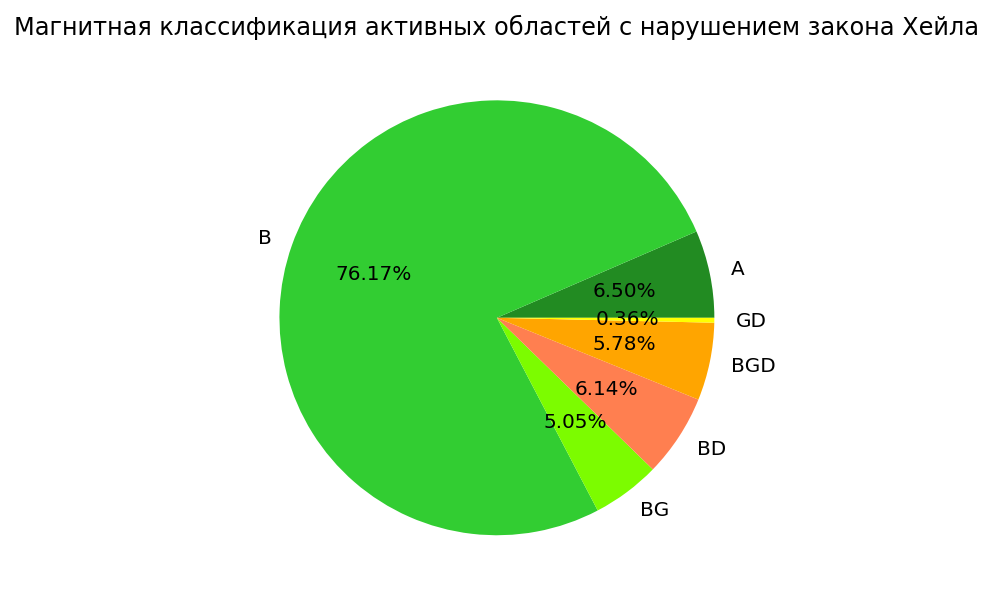

In [6]:
class_h_u = ['A', 'B', 'BG', 'BD', 'BGD', 'GD']
series_h_u = []
for i in class_h_u:
    series_h_u.append(
        len((np.where(np.array([i for i in dat['class_h_u']]) == i))[0])
    )

series = pd.Series(series_h_u, index=class_h_u, name='')
series.plot.pie(figsize=(5, 5), labels=class_h_u, autopct='%.2f%%',
                colors=['forestgreen', 'limegreen', 'lawngreen',
                        'coral', 'orange', 'yellow'])
re=plt.title('Магнитная классификация активных областей с нарушением закона Хейла')

##### Распределение активных областей с нарушением закона Хейла <br> по модифицированным Цюрихским классам

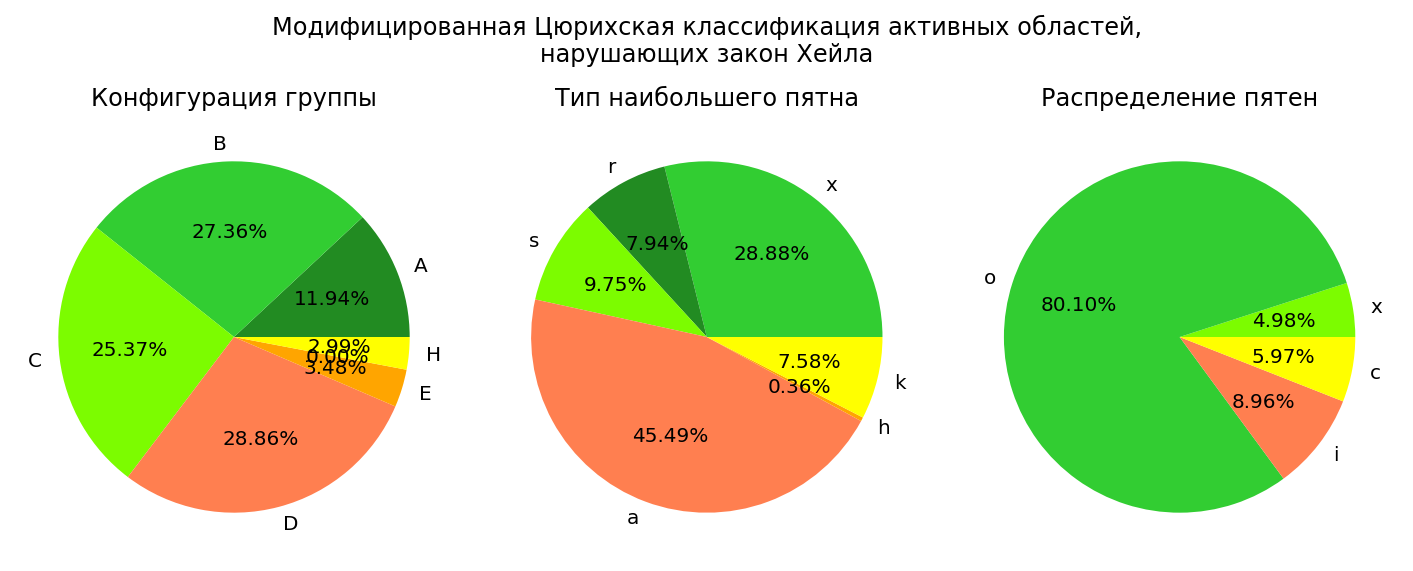

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

fig.suptitle('''Модифицированная Цюрихская классификация активных областей,
нарушающих закон Хейла''')
class_z_u = ['A', 'B', 'C', 'D', 'E', 'F', 'H']
series_z_u = []
for i in class_z_u:
    series_z_u.append(
        len((np.where(np.array([i[0] for i in dat['class_z_u']]) == i))[0])
    )

series = pd.Series(series_z_u, index=class_z_u, name='')
series.plot.pie(ax=axes[0],
                labels=class_z_u, autopct='%.2f%%',
                colors=['forestgreen', 'limegreen', 'lawngreen',
                        'coral', 'orange', 'chocolate', 'yellow'])
re=axes[0].set_title('Конфигурация группы')

class_z_u = ['x', 'r', 's', 'a', 'h', 'k']
series_z_u = []
for i in class_z_u:
    series_z_u.append(
        len((np.where(np.array([i[1] for i in dat['class_z_u']]) == i))[0])
    )

series = pd.Series(series_z_u, index=class_z_u, name='')
series.plot.pie(ax=axes[1],
                labels=class_z_u, autopct='%.2f%%',
                colors=['limegreen', 'forestgreen', 'lawngreen',
                        'coral', 'orange', 'yellow'])
re=axes[1].set_title('Тип наибольшего пятна')

class_z_u = ['x', 'o', 'i', 'c']
series_z_u = []
for i in class_z_u:
    series_z_u.append(
        len((np.where(np.array([i[2] for i in dat['class_z_u']]) == i))[0])
    )

series = pd.Series(series_z_u, index=class_z_u, name='')
series.plot.pie(ax=axes[2],
                labels=class_z_u, autopct='%.2f%%',
                colors=['lawngreen', 'limegreen', 'coral', 'yellow'])
re=axes[2].set_title('Распределение пятен')
fig.tight_layout()
fig.subplots_adjust(top=0.8)

##### Временное изменение годового числа активных областей, <br> нарушающих закон Хейла

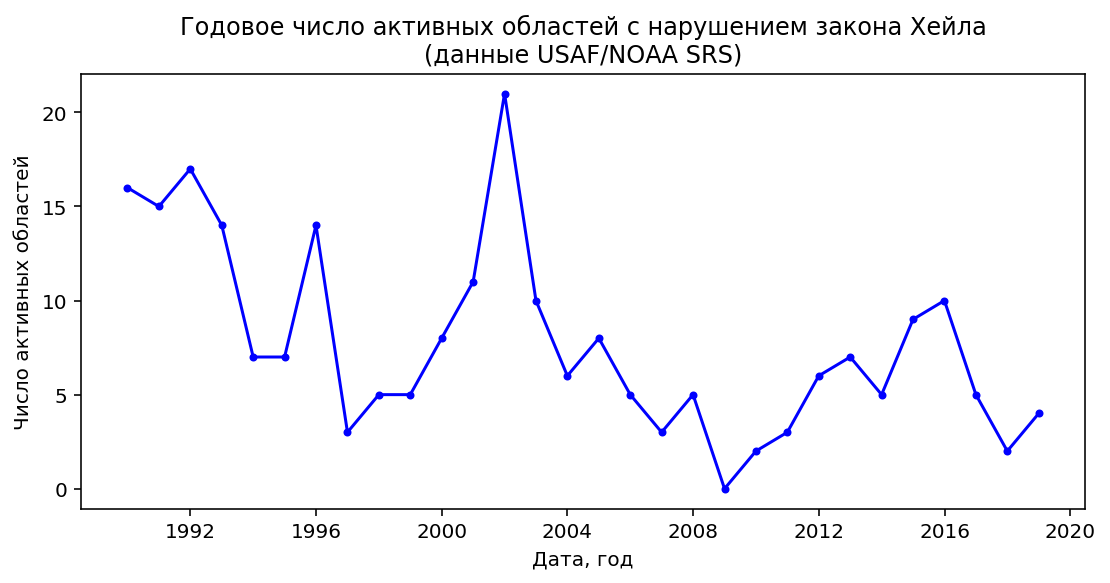

In [8]:
time = dat['datetime_u']
ar = np.ones(len(time))

ts = pd.Series(ar, index=time)
res = ts.resample('Y').sum()

fig, ax = plt.subplots(figsize=(9, 4))
plt.scatter(res.index, res.values, color='blue', marker='.')
plt.plot(np.array(res.index), np.array(res.values), color='blue')

l1=ax.set_xlabel('Дата, год')
l2=ax.set_ylabel('Число активных областей')
re=plt.title('''Годовое число активных областей с нарушением закона Хейла
(данные USAF/NOAA SRS)''')

##### Временное изменение годовой площади пятен активных областей, <br> нарушающих закон Хейла

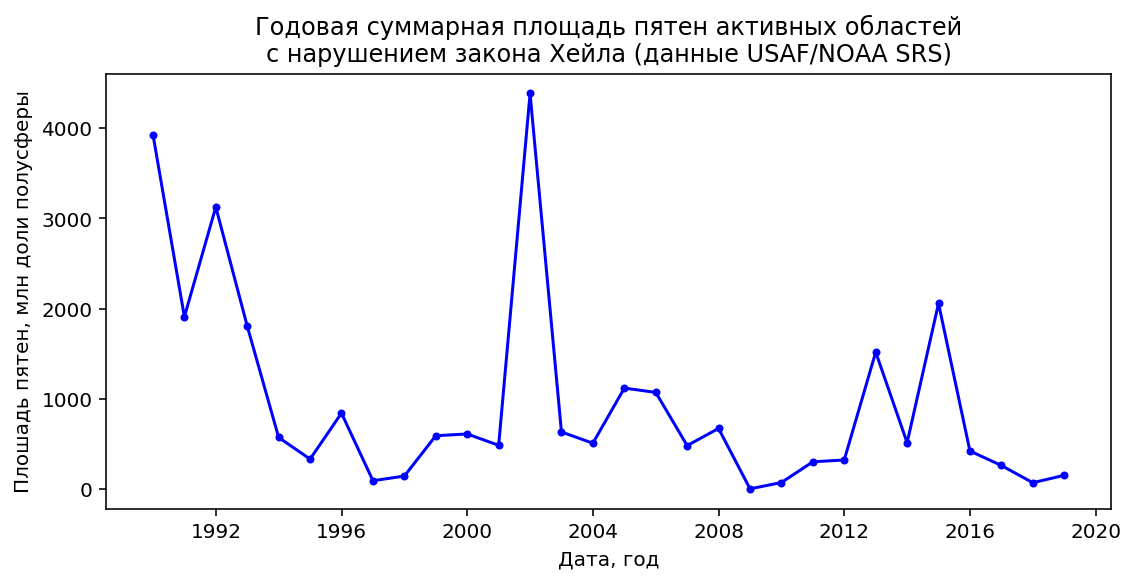

In [9]:
time = dat['datetime_u']
area = pd.Series(dat['area_cor_u']).values

ts = pd.Series(area, index=time)
res = ts.resample('Y').sum()

fig, ax = plt.subplots(figsize=(9, 4))
plt.scatter(res.index, res.values, color='blue', marker='.')
plt.plot(np.array(res.index), np.array(res.values), color='blue')

l1=ax.set_xlabel('Дата, год')
l2=ax.set_ylabel('Плошадь пятен, млн доли полусферы')
re=plt.title('''Годовая суммарная площадь пятен активных областей
с нарушением закона Хейла (данные USAF/NOAA SRS)''')

##### Использование специальных отметок

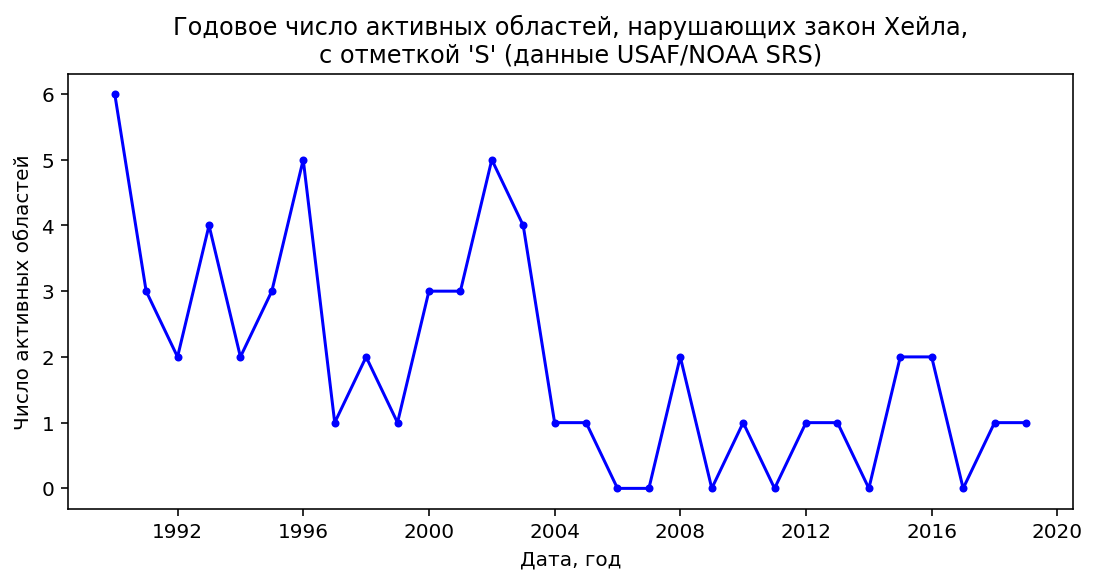

In [10]:
time = (dat['datetime_u'])
ar = np.zeros(len(time))

ind = (np.where((dat['m1'] == 'S')))[0]
ar[ind] = 1

ts = pd.Series(ar, index=time)
res = ts.resample('Y').sum()

fig, ax = plt.subplots(figsize=(9, 4))
plt.scatter(res.index, res.values, color='blue', marker='.')
plt.plot(np.array(res.index), np.array(res.values), color='blue')

l1=ax.set_xlabel('Дата, год')
l2=ax.set_ylabel('Число активных областей')
re=plt.title("""Годовое число активных областей, нарушающих закон Хейла,
с отметкой 'S' (данные USAF/NOAA SRS)""")

##### Разделение активных областей с нарушением закона Хейла <br>на циклы солнечной активности

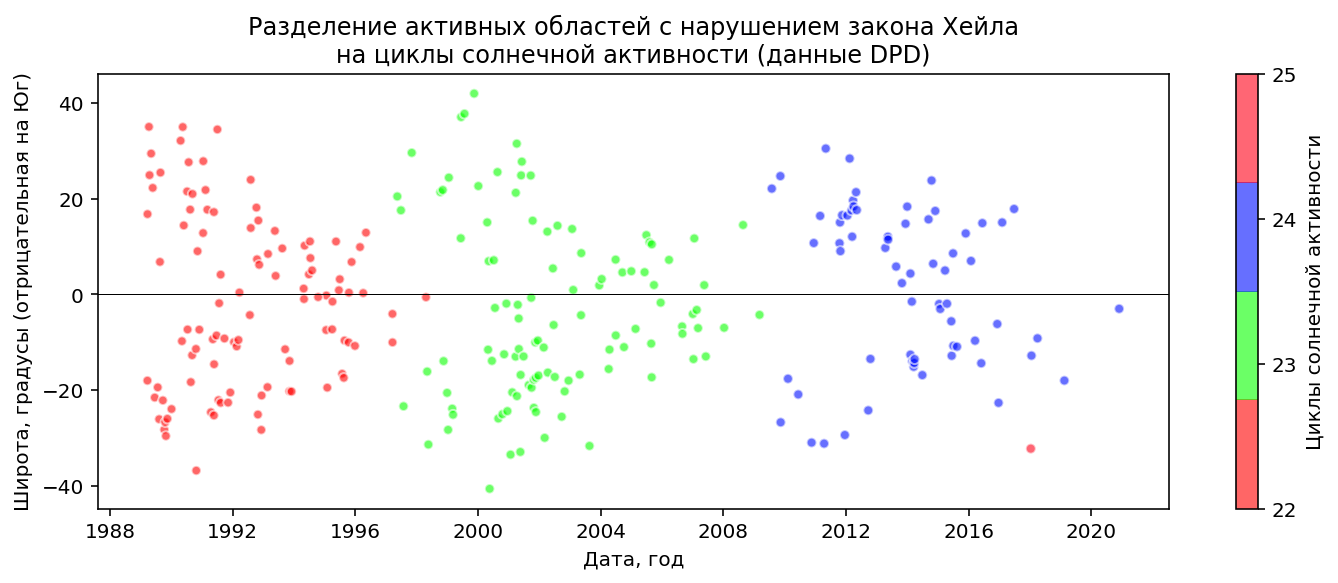

In [11]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax1 = dat.plot.scatter(x='datetime_d',
                       y='lat_d',
                       s=dat['cycle'],
                       c=dat['cycle'],colormap=plt.cm.get_cmap('hsv', 4), #'hsv', #
                       edgecolors='white', alpha=0.6,
                       figsize=(12, 4), ax=ax)

plt.axhline(y=0.0, color='black', linestyle='-', linewidth = .5)
l1=ax1.set_xlabel('Дата, год')
l2=ax1.set_ylabel(d_usaf.loc['lat_u'][1])
re=plt.title('''Разделение активных областей с нарушением закона Хейла
на циклы солнечной активности (данные DPD)''')

f = plt.gcf()
ax = f.get_axes()[1]
cax = ax.set_ylabel('Циклы солнечной активности')

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))